In [1]:
import numpy as np
import pandas as pd
from keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Dropout, Flatten, Dense
from keras.utils.np_utils import to_categorical
from sklearn.preprocessing import LabelBinarizer
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import cv2
import os
import glob
from PIL import Image
import random

%matplotlib inline

Using TensorFlow backend.


In [7]:
model = Sequential()
model.add(Conv2D(32, (3, 3), input_shape=(150, 150, 3), activation='relu'))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
# model.add(MaxPooling2D(pool_size=(2, 2)))
# model.add(Dropout(0.25))
# model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(64,  activation='relu'))
# model.add(Dropout(0.25))
model.add(Dense(7, activation='softmax'))

model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [15]:
train_datagen = ImageDataGenerator(
        rescale=1./255,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True)

In [16]:
train_generator = train_datagen.flow_from_directory('dataset/train/',
        target_size=(150, 150),
        batch_size=32,
        class_mode='categorical')


Found 1971 images belonging to 7 classes.


In [18]:
history = model.fit_generator(train_generator, epochs=50, steps_per_epoch=10, verbose=1)

Epoch 1/50
10/10 [==============================] - 7s 730ms/step - loss: 1.6370 - acc: 0.3531
Epoch 2/50
10/10 [==============================] - 7s 658ms/step - loss: 1.7187 - acc: 0.3312
Epoch 3/50
10/10 [==============================] - 9s 852ms/step - loss: 1.7098 - acc: 0.3188
Epoch 4/50
10/10 [==============================] - 7s 681ms/step - loss: 1.7113 - acc: 0.3070
Epoch 5/50
10/10 [==============================] - 7s 677ms/step - loss: 1.7021 - acc: 0.3031
Epoch 6/50
10/10 [==============================] - 9s 892ms/step - loss: 1.6943 - acc: 0.3344
Epoch 7/50
10/10 [==============================] - 9s 851ms/step - loss: 1.6780 - acc: 0.3500
Epoch 8/50
10/10 [==============================] - 7s 668ms/step - loss: 1.6270 - acc: 0.3531
Epoch 9/50
10/10 [==============================] - 8s 792ms/step - loss: 1.6402 - acc: 0.3781
Epoch 10/50
10/10 [==============================] - 8s 779ms/step - loss: 1.6509 - acc: 0.3688
Epoch 11/50
10/10 [==============================

In [19]:
model.save_weights('models/first_try.h5')

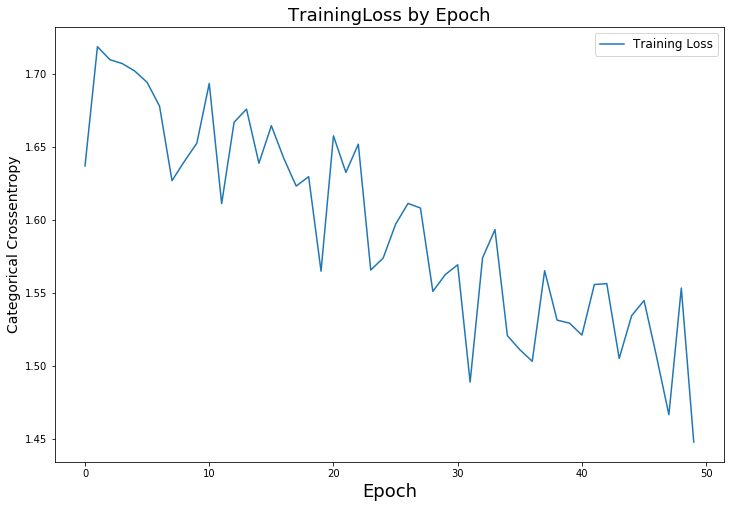

In [20]:
train_loss = history.history['loss']
plt.figure(figsize=(12, 8))
plt.plot(train_loss, label='Training Loss')
plt.title('Training Loss by Epoch', fontsize = 18)
plt.xlabel('Epoch', fontsize = 18)
plt.ylabel('Categorical Crossentropy', fontsize = 14)
plt.legend(fontsize = 12);

In [21]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_7 (Conv2D)            (None, 148, 148, 32)      896       
_________________________________________________________________
activation_11 (Activation)   (None, 148, 148, 32)      0         
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 72, 72, 32)        9248      
_________________________________________________________________
activation_12 (Activation)   (None, 72, 72, 32)        0         
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 36, 36, 32)        0         
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 34, 34, 64)        18496     
__________

In [28]:
# c = cv2.cvtColor(angry.copy, cv2.COLOR_BGR2RGB)

In [8]:
angry = [cv2.imread(file) for file in glob.glob('dataset/train/angry/*.*')]
contempt = [cv2.imread(file) for file in glob.glob('dataset/train/contempt/*.*')]
fear = [cv2.imread(file) for file in glob.glob('dataset/train/fear/*.*')]
happy = [cv2.imread(file) for file in glob.glob('dataset/train/happy/*.*')]
neutral = [cv2.imread(file) for file in glob.glob('dataset/train/neutral/*.*')]
sad = [cv2.imread(file) for file in glob.glob('dataset/train/sad/*.*')]
surprise = [cv2.imread(file) for file in glob.glob('dataset/train/surprise/*.*')]

In [9]:
angry = [img[:, :, ::-1] for img in angry if img is not None]
contempt = [img[:, :, ::-1] for img in contempt if img is not None]
fear = [img[:, :, ::-1] for img in fear if img is not None]
happy = [img[:, :, ::-1] for img in happy if img is not None]
neutral = [img[:, :, ::-1] for img in neutral if img is not None]
sad = [img[:, :, ::-1] for img in sad if img is not None]
surprise = [img[:, :, ::-1] for img in surprise if img is not None]

In [10]:
angry = [cv2.resize(img, (150, 150)) for img in angry]
contempt = [cv2.resize(img, (150, 150)) for img in contempt]
fear = [cv2.resize(img, (150, 150)) for img in fear]
happy = [cv2.resize(img, (150, 150)) for img in happy]
neutral = [cv2.resize(img, (150, 150)) for img in neutral]
sad = [cv2.resize(img, (150, 150)) for img in sad]
surprise = [cv2.resize(img, (150, 150)) for img in surprise]

In [11]:
emotions = [angry, contempt, fear, happy, neutral, sad, surprise]

In [12]:
for i, emotion in enumerate(emotions):
    print(f'{i} length is {len(emotion)}')

0 length is 267
1 length is 308
2 length is 299
3 length is 355
4 length is 244
5 length is 355
6 length is 264


In [ ]:
# 0 length is 267
# 1 length is 308
# 2 length is 299
# 3 length is 355
# 4 length is 244
# 5 length is 358
# 6 length is 266

In [13]:
y = len(angry) * [0] + len(contempt) * [1] + len(fear) * [2] + len(happy) * [3] + len(neutral) * [4] + len(sad) * [5] + len(surprise) * [6]

In [14]:
y = to_categorical(y)

In [100]:
# angry = [img.T for img in angry]
# contempt = [img.T for img in contempt]
# fear = [img.T for img in fear]
# happy = [img.T for img in happy]
# neutral = [img.T for img in neutral]
# sad = [img.T for img in sad]
# surprise = [img.T for img in surprise]

In [15]:
X = angry + contempt + fear + happy + neutral + sad + surprise

In [16]:
X = np.asarray(X)

In [17]:
print(X.shape, y.shape)

(2092, 150, 150, 3) (2092, 7)


In [18]:
X = X.astype('float32')

In [19]:
X /= 255

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

In [21]:
train_datagen = ImageDataGenerator(
    featurewise_center=True,
    featurewise_std_normalization=True,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True)

In [22]:
train_generator = train_datagen.flow(X_train, y_train,
        batch_size=32)

In [24]:
history = model.fit_generator(train_generator,
                    steps_per_epoch=10,
                    epochs=50,
                    validation_data=(X_test, y_test),
                    validation_steps=10)

Epoch 1/50
10/10 [==============================] - 13s 1s/step - loss: 1.8957 - acc: 0.2062 - val_loss: 1.9059 - val_acc: 0.2571
Epoch 2/50
10/10 [==============================] - 12s 1s/step - loss: 1.8879 - acc: 0.2094 - val_loss: 1.8820 - val_acc: 0.2000
Epoch 3/50
10/10 [==============================] - 13s 1s/step - loss: 1.8888 - acc: 0.2250 - val_loss: 1.9110 - val_acc: 0.2286
Epoch 4/50
10/10 [==============================] - 13s 1s/step - loss: 1.8759 - acc: 0.2125 - val_loss: 1.8901 - val_acc: 0.2381
Epoch 5/50
10/10 [==============================] - 13s 1s/step - loss: 1.8901 - acc: 0.2344 - val_loss: 1.8909 - val_acc: 0.2571
Epoch 6/50
10/10 [==============================] - 13s 1s/step - loss: 1.8779 - acc: 0.2549 - val_loss: 1.8880 - val_acc: 0.2667
Epoch 7/50
10/10 [==============================] - 13s 1s/step - loss: 1.8701 - acc: 0.2219 - val_loss: 1.9144 - val_acc: 0.2190
Epoch 8/50
10/10 [==============================] - 14s 1s/step - loss: 1.8852 - acc: 0.23

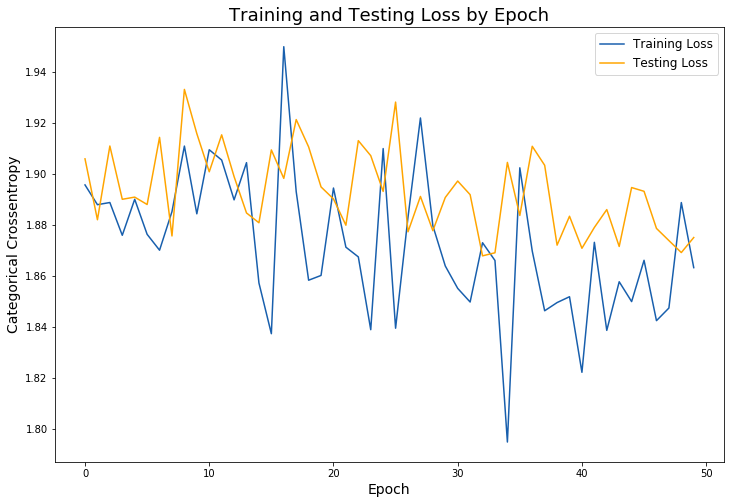

In [25]:
train_loss = history.history['loss']
test_loss = history.history['val_loss']
plt.figure(figsize=(12, 8))
plt.plot(train_loss, label='Training Loss', color='#185fad')
plt.plot(test_loss, label='Testing Loss', color='orange')
plt.title('Training and Testing Loss by Epoch', fontsize = 18)
plt.xlabel('Epoch', fontsize = 14)
plt.ylabel('Categorical Crossentropy', fontsize = 14)
plt.legend(fontsize = 12);

In [142]:
model.save_weights('models/second_try.h5')